In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, GlobalMaxPooling2D, Activation, Add
from tensorflow.keras.models import Model, Sequential

In [3]:
train_dir = r"D:\Projects\ML\Datasets\dogs-vs-cats\train\train"
test_dir = r"D:\Projects\ML\Datasets\dogs-vs-cats\test1\test1"

In [4]:
imgSize=50

In [5]:
def get_label(img):
    img=img.split('.')
    if(img[0]=='cat'):
        return [0]
    else:
        return [1]

In [6]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(train_dir)):            #going to each image by name, img=cat.0.jpg and so on
        path = os.path.join(train_dir, img)            #joining dir path to name, get full path of image in path
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  #read image from that path using cv2 and get numpy array
        image = cv2.resize(image, (imgSize, imgSize))
        label = get_label(img)                          #get name as cat and dog from each images name
        data = [np.array(image), np.array(label)]
        training_data.append(data)
    shuffle(training_data)
    return training_data

In [7]:
train_data = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:34<00:00, 730.48it/s]


In [8]:
x = train_data[:-1000]
y = train_data[-1000:]

In [9]:
x[0][0].shape

(50, 50)

In [10]:
x_train = np.array([i[0] for i in x]).reshape(-1, imgSize, imgSize, 1)  #various nupy arrays inside a numpy array
y_train = np.array([i[1] for i in x])

In [11]:
x_test = np.array([i[0] for i in y]).reshape(-1, imgSize, imgSize, 1)
y_test = np.array([i[1] for i in y])

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
y_train = y_train.flatten()  #not necessary
y_test = y_test.flatten()

In [14]:
x_train[0].shape

(50, 50, 1)

In [15]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = Dropout(0.4)(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = Dropout(0.4)(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Dropout(0.4)(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Dropout(0.4)(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Dropout(0.4)(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = Dropout(0.4)(x)
x = MaxPooling2D((2,2))(x)


x = Flatten()(x)
# x = GlobalMaxPooling2D()(x)
# x = Dropout(0.2)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2)(x)
x = Dense(2,activation='softmax')(x)

model = Model(i,x)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496 

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
# batch_size = 32
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# train_generator = data_generator.flow(x_train,y_train, batch_size)
# steps_per_epoch = x_train.shape[0] // batch_size

In [19]:
# r = model.fit_generator(train_generator, validation_data=(x_test,y_test), steps_per_epoch=steps_per_epoch, epochs=50)

In [20]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50)

Train on 24000 samples, validate on 1000 samples
Epoch 1/50
24000/24000 [==============================] - 23s 940us/sample - loss: 0.6824 - accuracy: 0.5562 - val_loss: 0.6572 - val_accuracy: 0.6340
Epoch 2/50
24000/24000 [==============================] - 19s 787us/sample - loss: 0.6179 - accuracy: 0.6569 - val_loss: 0.6087 - val_accuracy: 0.6670
Epoch 3/50
24000/24000 [==============================] - 19s 798us/sample - loss: 0.5547 - accuracy: 0.7171 - val_loss: 0.5366 - val_accuracy: 0.7500
Epoch 4/50
24000/24000 [==============================] - 19s 785us/sample - loss: 0.5180 - accuracy: 0.7462 - val_loss: 0.5034 - val_accuracy: 0.7760
Epoch 5/50
24000/24000 [==============================] - 19s 789us/sample - loss: 0.4876 - accuracy: 0.7652 - val_loss: 0.5114 - val_accuracy: 0.7600
Epoch 6/50
24000/24000 [==============================] - 19s 787us/sample - loss: 0.4638 - accuracy: 0.7788 - val_loss: 0.4627 - val_accuracy: 0.8160
Epoch 7/50
24000/24000 [=====================

In [21]:
print("Training: ", model.evaluate(x_train, y_train))
print("Testing: ", model.evaluate(x_test, y_test))

24000/24000 [==============================] - 6s 253us/sample - loss: 0.3511 - accuracy: 0.8777
Training:  [0.3511292610168457, 0.8777083]
1000/1000 [==============================] - 0s 285us/sample - loss: 0.3695 - accuracy: 0.8630
Testing:  [0.3694841213226318, 0.863]


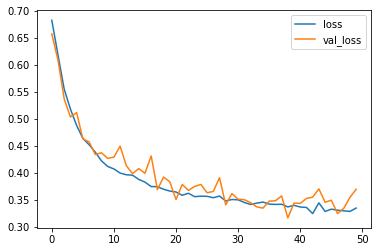

In [22]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

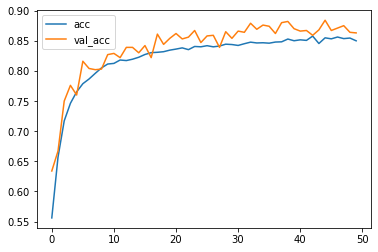

In [23]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [24]:
#model.save("graypadd.h5")

In [25]:
#graypadd = tf.keras.models.load_model("mymodel.h5")

In [26]:
# case 1- grayscale without sride(with padding)
# case 2- rgb with strides